In [28]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

#**Importing Data**

In [29]:
mnist = keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#**Preprocessing**

In [30]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)

#**Model Building**

In [31]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

#**Training**

In [32]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1725 - accuracy: 0.9448 - val_loss: 0.0742 - val_accuracy: 0.9781
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.0843 - val_accuracy: 0.9777
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0689 - val_accuracy: 0.9809
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0180 - accuracy: 0.9937 - val_loss: 0.0657 - val_accuracy: 0.9837
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0729 - val_accuracy:

#**Evaluating**

In [33]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Loss :", loss)
print("Accuracy :", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9861
Loss : 0.07078410685062408
Accuracy : 0.9861000180244446


#**Results**

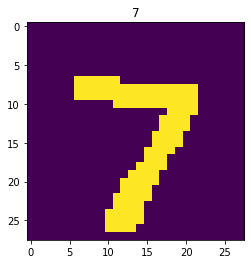

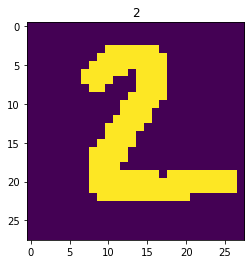

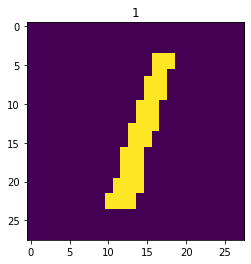

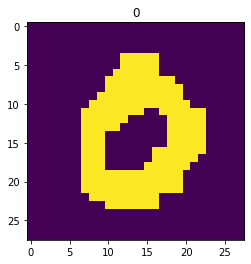

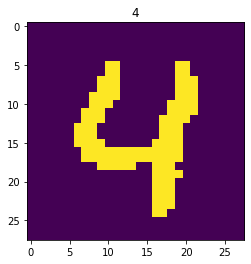

In [34]:
predection = model.predict(x_test)
for i in range(5):
  plt.imshow(x_test[i].reshape(x_test[0].shape[0], x_test[0].shape[1]))
  plt.title(np.argmax(predection[i]))
  plt.show()

In [35]:
model.save('save')

INFO:tensorflow:Assets written to: save/assets
